In [71]:
import plotly.graph_objects as go
import networkx as nx
import or_gym
import matplotlib.pyplot as plt
import numpy as np


plt.rcParams['figure.dpi'] = 256
plt.rcParams['text.usetex'] = True


def plot_network(env, ax):
    color = 'black'

    adjacency_matrix = np.vstack(env.graph.edges())
    # Set level colors
    level_col = {'retailer': 0,
                'distributor': 1,
                'manufacturer': 2,
                'raw_materials': 3}

    max_density = np.max([len(v) for v in env.levels.values()])
    node_coords = {}
    node_num = 1

    for i, (level, nodes) in enumerate(env.levels.items()):
        n = len(nodes)
        node_y = max_density / 2 if n == 1 else np.linspace(0, max_density, n)
        node_y = np.atleast_1d(node_y)
        ax.scatter(np.repeat(i, n), node_y, label=level, s=400, ec=color, fc='white', marker='o')

        for y in node_y:
            ax.annotate(r'$N_{}$'.format(node_num), xy=(i, y), ha='center', va='center', fontsize=10)
            node_coords[node_num] = (i, y)
            node_num += 1

    # Draw edges
    for node_num, v in node_coords.items():
        x, y = v
        sinks = adjacency_matrix[np.where(adjacency_matrix[:, 0]==node_num)][:, 1]
        for s in sinks:
            try:
                sink_coord = node_coords[s]
            except KeyError:
                continue
            
            x_ = np.hstack([x, sink_coord[0]])
            y_ = np.hstack([y, sink_coord[1]])
            ax.plot(x_, y_, color=color, linestyle='--', alpha=0.6, zorder=-10)

    ax.set_ylabel('Node')
    ax.set_yticks([0], [''])
    ax.set_xlabel('Level')
    ax.set_xticks(np.arange(len(env.levels)), [k for k in env.levels.keys()])
    ax.axis('off')
    ax.set_ymargin(0.2)


/var/folders/v5/b2527n0x4zgb6khjjq0g22k40000gn/T/ipykernel_9199/1151853378.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


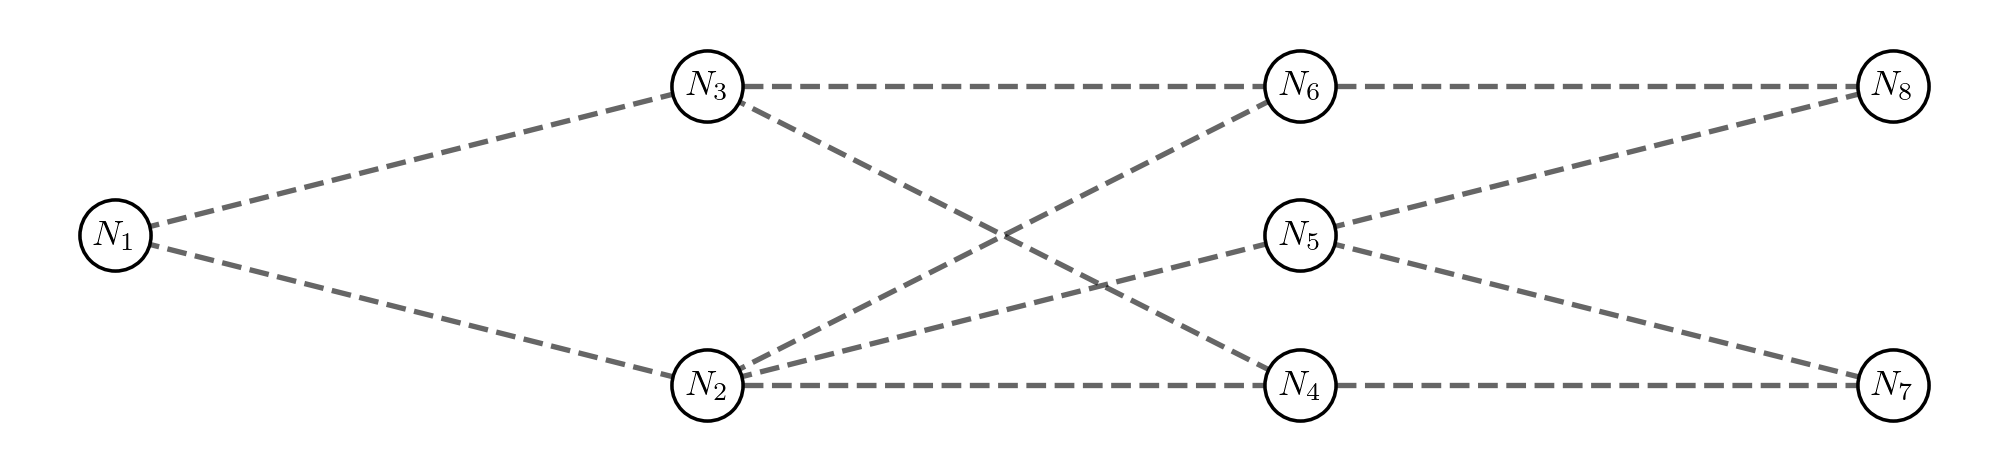

In [72]:
env = or_gym.make('NetworkManagement-v1')

fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(8, 2)

plot_network(env, ax)

fig.tight_layout()
fig.show()